In [25]:
!pip install opencv-python
!pip install pytesseract
!apt-get install -y tesseract-ocr
!apt-get install -y libtesseract-dev
!apt-get install -y tesseract-ocr-por

E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


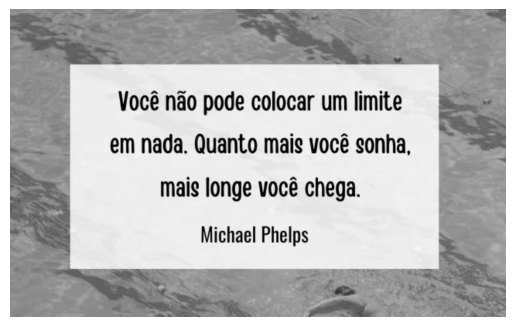

Você não pode colocar um limite
em nada. Quanto mais você sonha,

mais longe você chega.

Michael Phelps

 



In [26]:
import pytesseract
import cv2

# Carregando a imagem
img = cv2.imread('content/ESPORTE.png')

if img is None:
	raise FileNotFoundError("A imagem '/content/ESPORTE.png' não foi encontrada. Verifique o caminho do arquivo.")

# Convertendo para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Exibindo a imagem em escala de cinza
import matplotlib.pyplot as plt
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

# Aplicando o Tesseract OCR
texto = pytesseract.image_to_string(img_gray, lang='por')
print(texto)

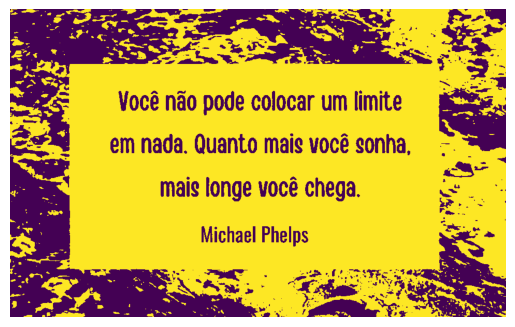

   

Você não pode colocar um limite
em nada. Quanto mais você sonha,
mais longe você chega.

 
 
   
 

 

Michael Phelps

 



In [27]:
# Aplicando técnicas de thresholding
_, img_thresh = cv2.threshold(img_gray, 142, 255, cv2.THRESH_BINARY)
plt.imshow(img_thresh)
plt.axis('off')
plt.show()

# Extraindo texto após pré-processamento
texto_thresh = pytesseract.image_to_string(img_thresh, lang='por')
print(texto_thresh)

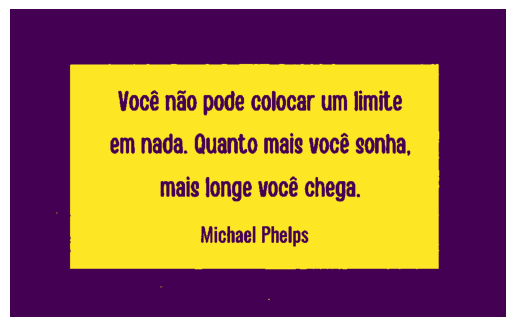

Você não pode colocar um limite
em nada. Quanto mais você sonha,

mais longe você chega.

Michael Phelps

 



In [28]:
# Aplicando o método de Otsu
_, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(img_otsu)
plt.axis('off')
plt.show()

# Extraindo texto após pré-processamento
texto_otsu = pytesseract.image_to_string(img_otsu, lang='por')
print(texto_otsu)

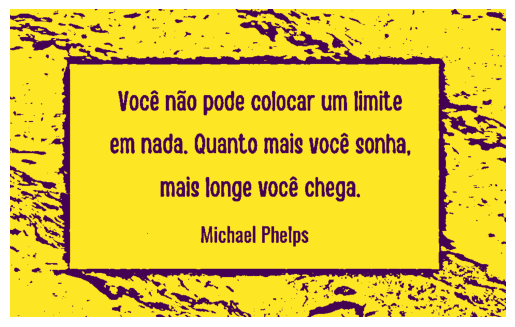

 
  
 

Você não pode colocar um limite
em nada. Quanto mais você sonha,
mais longe você chega.

   
   
 

Michael Phelps

 
 



In [29]:
# Aplicando limiarização adaptativa
img_adaptive_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 9)
plt.imshow(img_adaptive_mean)
plt.axis('off')
plt.show()

# Extraindo texto após pré-processamento
texto_adaptive_mean = pytesseract.image_to_string(img_adaptive_mean, lang='por')
print(texto_adaptive_mean)

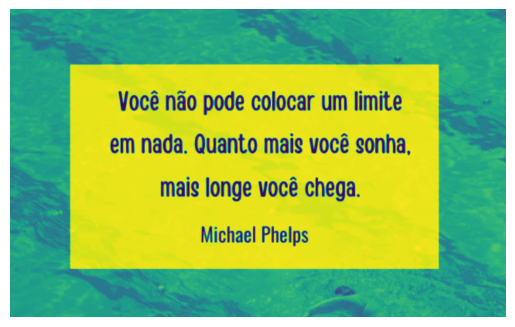

Você não pode colocar um limite
em nada. Quanto mais você sonha,

mais longe você chega.

Michael Phelps

 



In [30]:
# Aplicando filtros para remoção de ruído
img_median_blur = cv2.medianBlur(img_gray, 3)
plt.imshow(img_median_blur)
plt.axis('off')
plt.show()

# Extraindo texto após pré-processamento
texto_median_blur = pytesseract.image_to_string(img_median_blur, lang='por')
print(texto_median_blur)

In [31]:
from difflib import SequenceMatcher

# Texto original
texto_original = """
Você não pode colocar um limite
em nada. Quanto mais você sonha,
mais longe você chega.

Michael Phelps
"""

# Variáveis que contêm os textos OCR a serem verificados
texto_ocr_variants = {
    "texto": texto,
    "texto_thresh": texto_thresh,
    "texto_otsu": texto_otsu,
    "texto_adaptive_mean": texto_adaptive_mean,
    "texto_median_blur": texto_median_blur,
}

def compare_texts(original, ocr_text):
    matcher = SequenceMatcher(None, original, ocr_text)
    match_ratio = matcher.ratio()
    return match_ratio

def main():
    original_len = len(texto_original)
    print(f"Quantidade de caracteres no texto original: {original_len}\n")

    for variant_name, ocr_text in texto_ocr_variants.items():
        ocr_len = len(ocr_text)
        accuracy = compare_texts(texto_original, ocr_text)
        accuracy_percentage = accuracy * 100

        print(f"Resultado para {variant_name}:")
        print(f"Quantidade de caracteres no texto OCR: {ocr_len}")
        print(f"Percentual de acertos: {accuracy_percentage:.2f}%\n")


if __name__ == "__main__":
    main()

Quantidade de caracteres no texto original: 105

Resultado para texto:
Quantidade de caracteres no texto OCR: 109
Percentual de acertos: 97.20%

Resultado para texto_thresh:
Quantidade de caracteres no texto OCR: 127
Percentual de acertos: 90.52%

Resultado para texto_otsu:
Quantidade de caracteres no texto OCR: 109
Percentual de acertos: 97.20%

Resultado para texto_adaptive_mean:
Quantidade de caracteres no texto OCR: 129
Percentual de acertos: 89.74%

Resultado para texto_median_blur:
Quantidade de caracteres no texto OCR: 109
Percentual de acertos: 97.20%



In [37]:
!pip install paddleocr paddlepaddle pdf2image
#sudo apt-get install poppler-utils 

[sudo] senha para lucas: 
sudo: uma senha é necessária
^C


In [44]:
%pip install --upgrade paddlepaddle==2.4.2
%pip install paddleocr==2.6.1.3 pdf2image


Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 KB 4.3 MB/s eta 0:00:00a 0:00:01
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (67.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 10.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: PyMuPDF
    Found existing installation: PyMuPDF 1.26.0
    Uninstalling PyMuPDF-1.26.0:
      Successfully uninstalled PyMuPDF-1.26.0
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.10.0.84
    Uninstalling opencv-contrib-python-4.10.0.84:
      Successfully uninstalled opencv-contrib-python-4.10.0.84
  Attempting uninstall: paddleocr
    Found existing installation: paddleocr 3.0.1
    Uninstalling paddleocr-3.0.1:
      Successfully uninstalled paddleocr-3.0.1
Note: you may need to restart the kernel to use updated packages.


In [45]:

from paddleocr import PaddleOCR
from pdf2image import convert_from_path
import os

# Inicializa o OCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

def extract_text_from_pdf(pdf_path):
    # Converte PDF em imagens (uma por página)
    pages = convert_from_path(pdf_path)
    result = ''
    for i, page in enumerate(pages):
        # Salva página temporariamente como imagem
        img_path = f'temp_page_{i}.png'
        page.save(img_path, 'PNG')
        # OCR na imagem
        ocr_result = ocr.ocr(img_path)
        for line in ocr_result:
            for word in line:
                result += word[1][0] + ' '
            result += '\n'
        os.remove(img_path)
    return result

# Caminho para o arquivo PDF
pdf_path = "/content/conta_enel_ficticia.pdf"

# Extrai texto do PDF usando OCR
ocr_text = extract_text_from_pdf(pdf_path)
print(ocr_text)

/tmp/ipykernel_452439/3133613708.py:6: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='en')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /home/lucas/.paddlex/official_models.


AttributeError: 'paddle.base.libpaddle.AnalysisConfig' object has no attribute 'set_optimization_level'

In [ ]:
import re

# Expressões regulares para encontrar padrões específicos
padrao_cpf_cnpj = r"CPF/ CNPJ:\s([\d.-]+)"
padrao_nome_cliente = r"CPF:\s([\w\s]+)\s\d{3}\.\d{3}\.\d{3}-\d{2}"
padrao_num_cliente = r"NDO CLIENTE\s(\d+)"
padrao_data_leitura = r"DataLeitor\sLeitura\s(\d{2}/\d{2}/\d{4})"
padrao_data_vencimento = r"MES/AN\sVENCIMENT\sTOTAL\sA\sPAGAF\s(\d{2}/\d{4}\s\d{2}/\d{2}/\d{4})"
padrao_valor_total = r"R\$(\d+,\d{2})"
padrao_descricao_faturamento = r"DESCRICAO DO FATURAMENTO(.*?)MENTOS DE MEI"
padrao_referencia_faturamento = r"Referencia\s(\d{2}/\d{4}\s\d{2}/\d{2}/\d{4})"
padrao_qr_code = r"Pague via PIX! Utilize este QR Code"

# Função para extrair informações com base nos padrões de expressão regular
def extrair_informacoes(texto, padrao):
    match = re.search(padrao, texto)
    if match:
        return match.group(1)
    else:
        return None

# Extrair informações
cpf_cnpj = extrair_informacoes(ocr_text, padrao_cpf_cnpj)
nome_cliente = extrair_informacoes(ocr_text, padrao_nome_cliente)
num_cliente = extrair_informacoes(ocr_text, padrao_num_cliente)
data_vencimento = extrair_informacoes(ocr_text, padrao_data_vencimento)
valor_total = extrair_informacoes(ocr_text, padrao_valor_total)
referencia_faturamento = extrair_informacoes(ocr_text, padrao_referencia_faturamento)

# Verificar se há QR Code presente
qr_code_presente = re.search(padrao_qr_code, ocr_text) is not None

# Exibir informações extraídas
print("Nome do Cliente:", nome_cliente)
print("CPF/CNPJ:", cpf_cnpj)
print("Número do cliente:", num_cliente)
print("Data de vencimento:", data_vencimento)
print("Valor total:", valor_total)
print("Referência do faturamento:", referencia_faturamento)
print("QR Code presente:", qr_code_presente)